In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [4]:
df['Heart Disease'] = df['Heart Disease'].replace({"Presence": 1, "Absence": 0})
df['Heart Disease'] = df['Heart Disease'].infer_objects(copy=False)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_27724\2846980423.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Heart Disease'] = df['Heart Disease'].replace({"Presence": 1, "Absence": 0})


In [5]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [6]:
from sklearn.model_selection import train_test_split

x, y = df.drop("Heart Disease", axis=1), df["Heart Disease"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=9)

## Scale-Insensitive
### Random forest classifier
### Naive bayes
### Gradient boosting

In [7]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [8]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)

GaussianNB()

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier()

## Scaling Data

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [12]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train_scaled, y_train)

LogisticRegression()

In [13]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_scaled, y_train)

SVC()

In [14]:
forest.score(x_test, y_test)

0.8425925925925926

In [15]:
forest.score(x_test, y_test)

0.8425925925925926

In [16]:
gb_clf.score(x_test, y_test)

0.7870370370370371

In [17]:
knn.score(x_test_scaled, y_test)

0.8518518518518519

In [18]:
log.score(x_test_scaled, y_test)

0.8518518518518519

In [19]:
svc.score(x_test_scaled, y_test)

0.8611111111111112

## Using recall score to minimize false negatives, which is critical in medical diagnosis

In [20]:
from sklearn.metrics import recall_score

y_preds = forest.predict(x_test)
print("Forest: ", recall_score(y_test, y_preds))

y_preds = nb_clf.predict(x_test)
print("NB: ", recall_score(y_test, y_preds))

y_preds = gb_clf.predict(x_test)
print("GB: ", recall_score(y_test, y_preds))

y_preds = knn.predict(x_test_scaled)
print("KNN: ", recall_score(y_test, y_preds))

y_preds = log.predict(x_test_scaled)
print("Log: ", recall_score(y_test, y_preds))

y_preds = svc.predict(x_test_scaled)
print("SVC: ", recall_score(y_test, y_preds))

Forest:  0.7142857142857143
NB:  0.8333333333333334
GB:  0.7142857142857143
KNN:  0.8333333333333334
Log:  0.7619047619047619
SVC:  0.7857142857142857


### Both Naive_Bayes and KNN have same recall_score so comparing f1_score

In [21]:
from sklearn.metrics import f1_score
y_preds = knn.predict(x_test_scaled)
print("KNN: ", f1_score(y_test, y_preds))

y_preds = nb_clf.predict(x_test)
print("NB: ", f1_score(y_test, y_preds))

KNN:  0.813953488372093
NB:  0.8536585365853658


### As Naive_Bayes has better f1 score, it will be considered 

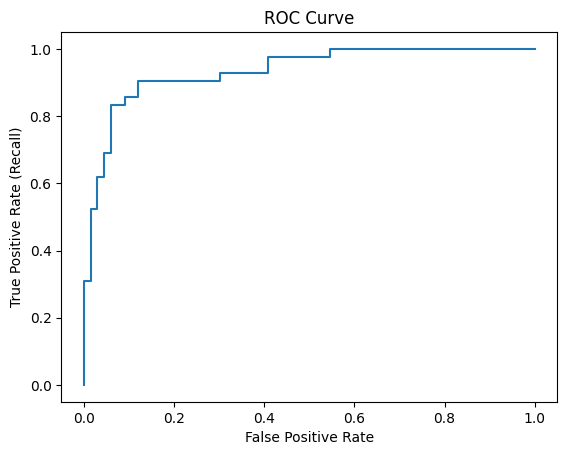

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = nb_clf.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.show()

In [23]:
roc_auc_score(y_test, y_probs)

0.9343434343434344

## Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

# Naive Bayes Grid
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}

nb_clf = GaussianNB()
grid_search_nb = GridSearchCV(estimator=nb_clf, param_grid=param_grid_nb, cv=3, n_jobs=-1, verbose=2, scoring='recall', refit=True, return_train_score=True)
grid_search_nb.fit(x_train, y_train)
best_nb = grid_search_nb.best_estimator_

# KNN Grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_clf = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_clf, param_grid=param_grid_knn, cv=3, n_jobs=-1, verbose=2, scoring='recall', refit=True, return_train_score=True)
grid_search_knn.fit(x_train, y_train)
best_knn = grid_search_knn.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits


## Using voting classifier, to use strengths of both classifiers (Naive Bayes and KNN)

In [39]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('nb', best_nb), ('knn', best_knn)], voting='soft')

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('knn', KNeighborsClassifier(metric='manhattan'))],
                 voting='soft')

In [40]:
from sklearn.metrics import recall_score

y_pred = voting_clf.predict(x_test)
recall = recall_score(y_test, y_pred)

print(f"Voting Classifier Recall: {recall}")


Voting Classifier Recall: 0.8095238095238095


In [41]:
import numpy as np
import pandas as pd

feature_names = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

sample = np.array([70, 1, 4, 130, 322, 0, 2, 109, 0, 2.4, 2, 3, 3]).reshape(1, -1)

sample_df = pd.DataFrame(sample, columns=feature_names)

prediction = voting_clf.predict(sample_df)

In [43]:
if prediction[0]==1:
    print("Presence of Heart Disease")
elif prediction[0]==0:
    print("Absence of Heart Disease")

Presence of Heart Disease


### Saving the trained model

In [44]:
import pickle

filename = "trained_model.sav"
pickle.dump(voting_clf, open(filename, 'wb'))

### Loading the saved model

In [45]:
loaded_model = pickle.load(open("trained_model.sav", 'rb'))

In [46]:
loaded_model

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('knn', KNeighborsClassifier(metric='manhattan'))],
                 voting='soft')

In [48]:
# checking
import numpy as np
import pandas as pd

feature_names = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

sample = np.array([70, 1, 4, 130, 322, 0, 2, 109, 0, 2.4, 2, 3, 3]).reshape(1, -1)

sample_df = pd.DataFrame(sample, columns=feature_names)

prediction = loaded_model.predict(sample_df)

if prediction[0]==1:
    print("Presence of Heart Disease")
elif prediction[0]==0:
    print("Absence of Heart Disease")

Presence of Heart Disease
